In [2]:
import numpy as np
import matplotlib.pyplot as plt 
import pandas as pd
import glob
# import seaborn as sns
import scipy.optimize

In [3]:
path = '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Titration_Plots/DIP_gradient1_grant'
all_files = glob.glob(f'{path}/*Tdata*.csv')
all_files.sort()
dataframes = [pd.read_csv(file) for file in all_files]

print(all_files)

['/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Titration_Plots/DIP_gradient1_grant/T10472_20240117_1441_080_Tdata1.csv', '/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/Titration_Plots/DIP_gradient1_grant/T10472_20240117_1441_080_Tdata2.csv']


In [4]:
list_df = []  
vols = []

for i, f in enumerate(all_files):
  df = pd.read_csv(f)
  df["Cycle Number"] = i
  list_df.append(df)
  volume_max = df["Volume (mL)"].max()
  vols.append(volume_max)

#list_df
#vols

In [5]:
adjs = [0]
vol_tally = 0

for volume in vols[:-1]:
  vol_tally += volume
  adjs.append(vol_tally)

vol_tally
adjs

[0, 4.758]

In [6]:
for i, df in enumerate(list_df):
  df["Volume (mL)"] += adjs[i]

In [7]:
concat_df = pd.concat(list_df, ignore_index=True)
#concat_df

In [8]:
volumes = concat_df["Volume (mL)"]
pHs = concat_df["E(pH)"]

derivatives_list = [0]

for i in range(1, len(volumes)):
  derivative = (pHs[i] - pHs[i-1]) / (volumes[i] - volumes[i-1])
  derivatives_list.append(derivative)

concat_df["dpH/dV"] = derivatives_list

#print(volumes)

#concat_df

/var/folders/dy/5pp8f0k5741b6sm60ch4xzhc0000gn/T/ipykernel_53931/2391558651.py:7: RuntimeWarning: divide by zero encountered in double_scalars
  derivative = (pHs[i] - pHs[i-1]) / (volumes[i] - volumes[i-1])


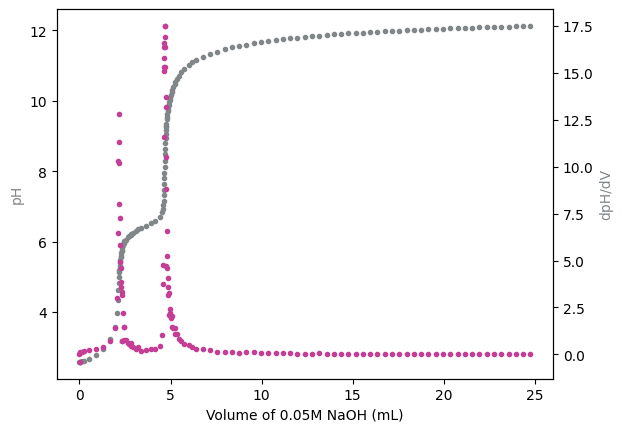

In [9]:
# plotting a general titration curve
color_gray = "#818689"
color_pink = "#c43e96"
color_blue = '317ec2'
color_orange = 'ff8314'

fig, titration_curve = plt.subplots()

derivative_curve = titration_curve.twinx()
derivative_curve.plot(volumes, derivatives_list, '.', color=color_pink)
derivative_curve.set_ylabel('dpH/dV', color=color_gray)

titration_curve.plot(volumes, pHs, '.', color=color_gray)
titration_curve.set_xlabel('Volume of 0.05M NaOH (mL)')
titration_curve.set_ylabel('pH', color=color_gray)

plt.show()

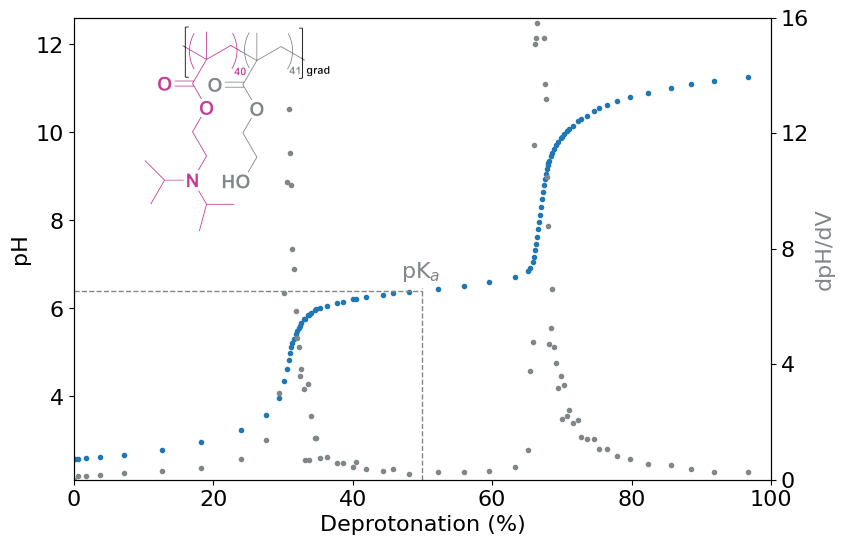

In [10]:
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

# Define constants and normalize volumes
min_x = 0
max_x = 7
normalized_volumes = (volumes - min_x) / (max_x - min_x) * 100
axis_label_fontsize = 16

# Begin figure creation
fig, titration_curve = plt.subplots(figsize=(9, 6))

img = plt.imread('/Users/aryellewright/Documents/Documents - Aryelle’s MacBook Air/Kumar-Biomaterials-Lab/ChemDraw Polymer Images/DIP G1.png')
# Create an inset axis for the image
axins = inset_axes(titration_curve, width="45%", height="45%", loc='upper left')

# Display the PNG image in the inset axis
axins.imshow(img)
axins.axis('off')  # Turn off axis for the inset

# Derivative curve properties
derivative_curve = titration_curve.twinx()
derivative_curve.set_yticks(np.linspace(0, 16, 5))
derivative_curve.tick_params(axis='y', which='major', labelsize=axis_label_fontsize)
derivative_curve.plot(normalized_volumes, derivatives_list, '.', color=color_gray)
derivative_curve.set_ylim(bottom=0, top=16)
derivative_curve.set_ylabel('dpH/dV', color=color_gray, fontsize=axis_label_fontsize)

# Titration curve properties
titration_curve.set_xticks(np.linspace(0, 100, 6))  # Set to 6 ticks as per the first code snippet
titration_curve.tick_params(axis='both', which='major', labelsize=axis_label_fontsize)
titration_curve.plot(normalized_volumes, pHs, '.', color=color_blue)
titration_curve.axvline(x=50, ymin=0, ymax=0.415, color=color_gray, linestyle='--', linewidth=1)
titration_curve.text(47, 6.7, 'pK$_a$', color=color_gray, fontsize=axis_label_fontsize)
titration_curve.axhline(y=6.4, xmin=0, xmax=0.5, color=color_gray, linestyle='--', linewidth=1)
titration_curve.set_xlabel('Deprotonation (%)', fontsize=axis_label_fontsize)
titration_curve.set_ylabel('pH', fontsize=axis_label_fontsize)
titration_curve.set_xlim(0, 100)

plt.show()


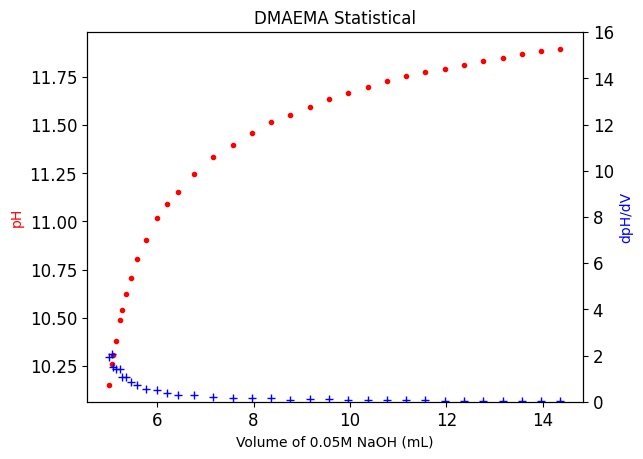

In [11]:
# trimming to look at just a region
min_x = 5
max_x = 14.5

# trimming our data fram to only include the volumes that are greater than our minimum x value and less than our maximum x value
trimmed_df = concat_df[(concat_df["Volume (mL)"] > min_x) 
                       & (concat_df["Volume (mL)"] < max_x)]

# saving our volumes, pH, and derivatives as variables from our newest trimmed dataframe
volumes = trimmed_df["Volume (mL)"]
pHs = trimmed_df["E(pH)"]
derivatives_list = trimmed_df["dpH/dV"]


# creating a plot that can have two y-axis
fig, titration_curve = plt.subplots()

# plotting the two sets of data
derivative_curve = titration_curve.twinx()
derivative_curve.grid(False)
derivative_curve.set_ylim(bottom=0,top=16)
titration_curve.plot(volumes, pHs, '.', color='red')
derivative_curve.plot(volumes, derivatives_list, '+', color='blue')

# labelling the axes and adding color 
titration_curve.set_title('DMAEMA Statistical')
titration_curve.set_xlabel('Volume of 0.05M NaOH (mL)')
titration_curve.set_ylabel('pH', color='red')
derivative_curve.set_ylabel('dpH/dV', color='blue')

# setting tick parameters for better visibility
titration_curve.tick_params(axis='both', labelsize=12)
derivative_curve.tick_params(axis='y', labelsize=12)

# Let's quantitatively locate our inflection points
Below, I set a region of interest around our two inflection points to locate them. You need to chance the values for region 1 and region two so that each inflection point is in the middle of them. For example, I choose region 1 to be between 44 and 46 and regino 2 to be between 48 and 52. 

In [12]:
# need to change these according to location of inflection pt. on plot above!
region_1 = [7, 10]
region_2 = [11, 13]

# finding our two infl
inflection_pt_1 = concat_df[(concat_df["Volume (mL)"]  >= region_1[0]) & 
                                  (concat_df["Volume (mL)"] <= region_1[1]) &
                                  (concat_df["dpH/dV"] != np.inf) ]
inflection_pt_2 = concat_df[(concat_df["Volume (mL)"]  >= region_2[0]) & 
                                  (concat_df["Volume (mL)"] <= region_2[1]) &
                                  (concat_df["dpH/dV"] != np.inf) ]

# printing the rows of data for the two inbflection points 
print(inflection_pt_1.sort_values(by="dpH/dV")[-1:])
#print()
print(inflection_pt_2.sort_values(by="dpH/dV")[-1:])

    Row Data #  Volume (mL)   E(pH)  Cycle Number  dpH/dV
88          27        7.165  11.336             1    0.22
    Row Data #  Volume (mL)   E(pH)  Cycle Number  dpH/dV
98          37       11.165  11.754             1  0.0675


In [13]:
# saving the rows of the two inflectino points
first_infl_pt = inflection_pt_1.sort_values(by="dpH/dV", ascending=False)[:1]
second_infl_pt = inflection_pt_2.sort_values(by="dpH/dV", ascending=False)[:1]

# finding the volume of the first inflection pt and the volume of the second inflection pt
inflection_pts_volume = [first_infl_pt["Volume (mL)"].values[0], second_infl_pt["Volume (mL)"].values[0]]

print(inflection_pts_volume)

[7.165, 11.165]


# Calculating the midpoint
Knowing the volumes of the two inflection points, we can calculate the mean to determine the volume of the midpoint

In [14]:
# finding the average of the two inflection points
volume_midpoint = np.mean(inflection_pts_volume)

# the volume of our midpoint
volume_midpoint

9.165

# Creating a dataframe of the most important info
In the following code, I create a dataframe of all the data between the two inflection points. Knowing the volume of our midpoint, you should rememeber that value and locate it in the midpoint dataframe. 

For example, since my midpoint volume is at 47.5mL, my pH is around 6.85. Remeber this value because it'll be used later for our chi-squared test. 

In [15]:
# creating a dataframe of everything between the two inflection points to help us find the midpoint
midpoint_df = concat_df[(concat_df["Volume (mL)"]  >= inflection_pts_volume[0]) & (concat_df["Volume (mL)"] <= inflection_pts_volume[1])]
midpoint_df
close_match_df = midpoint_df[midpoint_df['Volume (mL)'].between(9.73 - 0.5, 9.73 + 0.5)]
print(close_match_df)


    Row Data #  Volume (mL)   E(pH)  Cycle Number  dpH/dV
94          33        9.565  11.636             1  0.1050
95          34        9.965  11.665             1  0.0725


In [16]:
# again, sometimes this df is too long to print, so the following code will lock certain regions
#midpoint_df.loc['10':'12','Volume (mL)']

In [17]:
for i,vol in enumerate(midpoint_df["Volume (mL)"]):
  if vol > volume_midpoint:
    top_index = i
    bottom_index = top_index -1
    break

# We're going to normalize the x-axis

In [18]:
# creating the variable alpha to normalize our x-axis
alpha = (midpoint_df['Volume (mL)'] - inflection_pts_volume[0]) / (inflection_pts_volume[1] - inflection_pts_volume[0])

#alpha
#print(len(alpha))

# Now lets visualize the data we've narrowed down and the new x-axis we've normalized

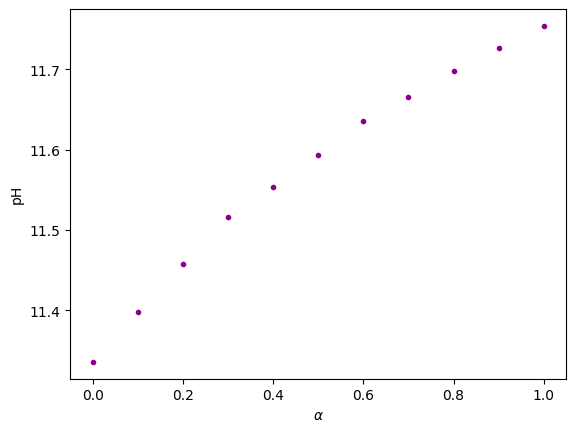

In [19]:
# plotting the dataframe thats zoomed in on everything between the inflection points on a normalized x-axis
plt.plot(alpha, midpoint_df["E(pH)"], '.', color='darkmagenta')
plt.xlabel(r'$\alpha$')
plt.ylabel("pH");

# Performing a chi-square test
We're going to use a chi-square test to best approximate the pKa. This is because the value of our pKa doesn't exist in our data. As we saw earlier, our midpoint volume was between two data points, meaning that the pKa isn't a value we cna locate. Instead, we're going to calculate it by performing a chi-squared test. 

# I found a [paper](https://onlinelibrary.wiley.com/doi/10.1002/pol.1947.120020409) that modifies the Hendersen-Hasselbach equation:
# $$ pH = pKa + log([A-]/[HA])$$ 
# to model cationic copolymers: 
# $$pH = pKa - n log((1-a)/a)$$

# The following code uses three different 'fits' to see which value of $n$ 'fits' our actual data the best.

/Users/aryellewright/Library/Python/3.9/lib/python/site-packages/pandas/core/arraylike.py:402: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


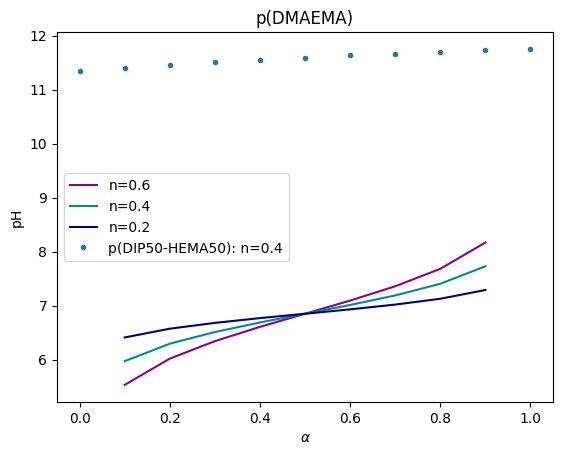

In [20]:
fit1 = 6.85 - 0.6 * np.log((1 - alpha) / alpha)
fit2 = 6.85 - 0.4 * np.log((1 - alpha) / alpha)
fit3 = 6.85 - 0.2 * np.log((1 - alpha) / alpha)

fits = [fit1, fit2, fit3]

#for fit in fits:
  #plt.plot(alpha, fit)

plt.plot(alpha, fit1, color='darkmagenta')
plt.plot(alpha, fit2, color='darkcyan')
plt.plot(alpha, fit3, color='navy')

plt.plot(alpha, midpoint_df["E(pH)"], '.')
plt.xlabel(r'$\alpha$')
plt.ylabel('pH')
plt.title('p(DMAEMA)')
plt.legend(["n=0.6","n=0.4","n=0.2",'p(DIP50-HEMA50): n=0.4']);

# We see that $n=0.6$ best fits our real data

# Now, let's set up information for the chi-squared test to estimate our value of pKa

For a given fit, the chi-squared value is defined as:

$$\chi^2 = \sum \frac{(O_i - E_i)^2}{E_i}$$

In [21]:
# creating a chi-squared function with the parameters
def chi_squared(params,data,alpha):

  # indexing values for alpha and data
  data = data.values[1:-1]
  alpha = alpha.values[1:-1]

  # setting my parameters
  pKa = params[0]
  n = params[1]
  chi_squared = 0

  # fitting the parameters with our cationic Henderson-Hasselbach equation
  fit = pKa - n * np.log((1 - alpha) / alpha)

  # using the chi_sqaured equation to fit 
  for i in range(len(data)):
    chi = (data[i] - fit[i])** 2 / fit[i]
    #print(chi)
    chi_squared += chi 

  return chi_squared

# Earlier I said to remember the estimated value of our pKa from our midpoint dataframe. In the following code, place this number, along wiht the best fit number, in the chi_sqaured function.
For this example, I inserted 6.85 and 0.6. 

In [22]:
chi_squared([6.85,0.6], midpoint_df["E(pH)"], alpha)

31.428762360953975

# Performing the chi-squared test
Add our pKa guess and the best fit value to the following code. Be sure to change the bounds so that they fit around the pKa value and fit around the n value. For example, I added 6 and 7 to include the 6.85 pKa guess and the 0.5 and 0.7 to include the best fit. 

In [23]:
ans = scipy.optimize.minimize(chi_squared, [6.85,0.6], args=(midpoint_df["E(pH)"],alpha), 
                        bounds=[(6,7),(0.5,0.7)])
ans.x

# the pKa estimation 
best_pKa = ans.x[0]

# the n estimation
best_n = ans.x[1]

In [24]:
# printing the best n value
best_n

0.5

In [25]:
# printing the best pKa
best_pKa

7.0

# Now, let's see how well our data fits with our chi-sqaured fit

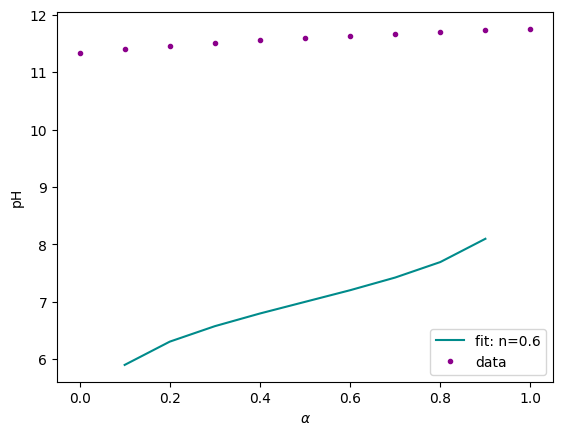

In [26]:
# plot the best fit
fit = best_pKa - best_n * np.log((1-alpha) / alpha)
plt.plot(alpha, fit, color="darkcyan")

# plot the data
plt.plot(alpha, midpoint_df["E(pH)"], '.', color='darkmagenta')

# labels
plt.xlabel(r'$\alpha$')
plt.ylabel('pH')
plt.legend(["fit: n=0.6","data"]);